<h4>Importing libraries</h4>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim# module to convert an address into latitude and longitude values
import requests

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML
import requests
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
!conda install -c conda-forge folium=0.5.0
import folium

/bin/bash: conda: command not found


<h4>Initialze API keys</h4>

In [3]:
# Foursquare api
CLIENT_ID = 'XGF5F1WVM0W1G3WDCA4MY2PFPMGPC5SRVZNDKKNHLPWSYBKJ'
CLIENT_SECRET = 'TSL2XDNGRPT5PECDN0JPIBIZVZ4UB1QLHJNVYCC52AJZRM2L'
VERSION = '20200802'
LIMIT = 3000

<h4>Fetching Cafes' details around Gurgaon city</h4> 

In [5]:
# lat lng of gurgaon
lat = 28.457523
lng = 77.026344
radius = 20000 # 20km radius
query = 'cafe'

#Foursquare api call
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,
radius,LIMIT,query)
results_cafes = requests.get(url).json()

In [6]:
results_cafes

{'meta': {'code': 200, 'requestId': '5fdd03352ccd992bc67d91a7'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d16d941735',
      'name': 'Café',
      'pluralName': 'Cafés',
      'primary': True,
      'shortName': 'Café'}],
    'hasPerk': False,
    'id': '4b9d01dff964a5202a8836e3',
    'location': {'address': 'SCO-24, Main Market',
     'cc': 'IN',
     'city': 'Gurgaon',
     'country': 'India',
     'crossStreet': 'Sector 31',
     'distance': 2415,
     'formattedAddress': ['SCO-24, Main Market (Sector 31)',
      'Gurgaon',
      'Haryāna',
      'India'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 28.453252855897027,
       'lng': 77.05054049699841}],
     'lat': 28.453252855897027,
     'lng': 77.05054049699841,
     'state': 'Haryāna'},
    'name': 'Cafe Coffee Day (CCD)',
    'referralId': 'v-1608319798'},
   {'categories': [{'icon': {'pre

In [8]:

#a = results_cafes['response']['venues']
#len(a)
cafe_list_name = []
cafe_list_lat = []
cafe_list_lng = []
cafe_list_cat = []

results_cafes['response']['venues'][0]['name']
results_cafes['response']['venues'][0]['location']['lat']
results_cafes['response']['venues'][0]['location']['lng']
results_cafes['response']['venues'][0]['location']['address']
results_cafes['response']['venues'][0]['categories'][0]['name']

for v_item in results_cafes['response']['venues'] :
    cafe_list_name.append(v_item['name'])
    cafe_list_lat.append(v_item['location']['lat'])
    cafe_list_lng.append(v_item['location']['lng'])    
    for cat_item in v_item['categories']:
        cafe_list_cat.append(cat_item['name'])
        


df_cafes = pd.DataFrame(list(zip(cafe_list_name,cafe_list_lat,cafe_list_lng,cafe_list_cat)),columns = ['name','latitude','longitude','category'])
df_cafes.head(5)


name   latitude  longitude           category
0  Cafe Coffee Day (CCD)  28.453253  77.050540               Café
1        Cafe Coffee Day  28.443509  77.055898               Café
2        Café Coffee Day  28.445862  77.044571        Coffee Shop
3                 Café G  28.468331  77.059575  Indian Restaurant
4              Cafe Soho  28.450522  77.031884              Diner

<h4> Analysing the dataset </h4>

In [9]:
catg = df_cafes.groupby('category')
catg.count()

name  latitude  longitude
category                                          
American Restaurant         1         1          1
Asian Restaurant            1         1          1
Automotive Shop             1         1          1
Bakery                      2         2          2
Bar                         1         1          1
Bistro                      1         1          1
Café                       21        21         21
Coffee Shop                 8         8          8
Diner                       1         1          1
Fast Food Restaurant        1         1          1
Indian Restaurant           3         3          3
Italian Restaurant          1         1          1
Lounge                      2         2          2
Malay Restaurant            1         1          1
Pizza Place                 1         1          1
South Indian Restaurant     1         1          1
Stationery Store            1         1          1
Tibetan Restaurant          1         1          1

In [10]:
# select only cafes & coffee shop
df_cafes_fltr = df_cafes[(df_cafes['category'] == 'Café') | (df_cafes['category'] == 'Coffee Shop')]
df_cafes_fltr.head()

name   latitude  longitude     category
0  Cafe Coffee Day (CCD)  28.453253  77.050540         Café
1        Cafe Coffee Day  28.443509  77.055898         Café
2        Café Coffee Day  28.445862  77.044571  Coffee Shop
5  Cafe Coffee Day (CCD)  28.468912  77.062180         Café
7  Cafe Coffee Day (CCD)  28.416664  77.041017  Coffee Shop

In [11]:
df_cafes_fltr.shape

(29, 4)

<h4> Visualizing the data </h4>

In [20]:
cafe_ggn_map = folium.Map(location = [lat,lng],zoom_start= 13)

for lat, lng, name in zip(df_cafes['latitude'],df_cafes['longitude'],df_cafes['name']):
    
    label = folium.Popup(name, parse_html = True)
    
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(cafe_ggn_map)  
    
cafe_ggn_map
x = []

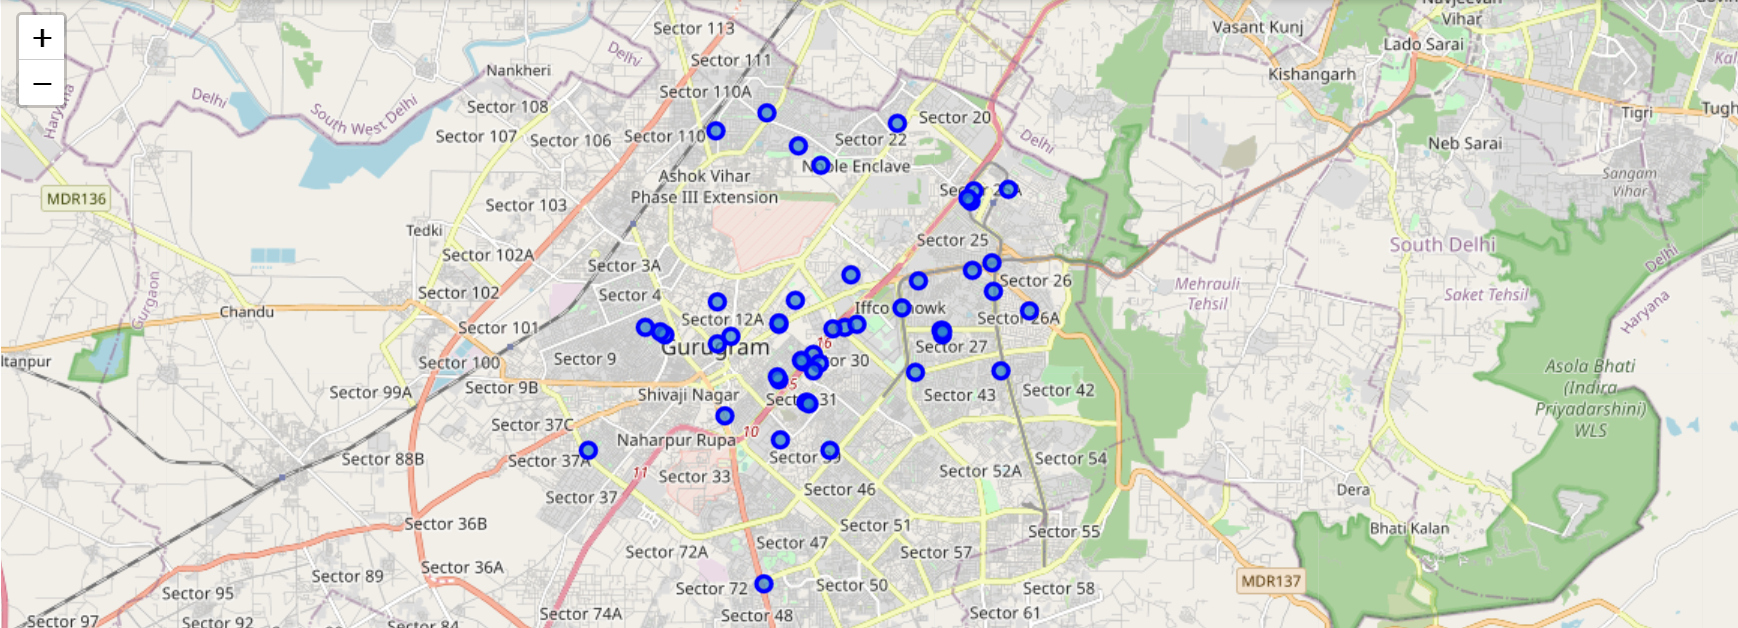

<h4>Cluster locations</h4>

In [13]:
df_cafes_K = df_cafes_fltr.drop(['name','category'], axis = 1)
df_cafes_K

latitude  longitude
0   28.453253  77.050540
1   28.443509  77.055898
2   28.445862  77.044571
5   28.468912  77.062180
7   28.416664  77.041017
8   28.472436  77.072627
11  28.459237  77.075589
12  28.508034  77.030053
13  28.467648  77.081393
15  28.475493  77.093429
16  28.458394  77.043989
19  28.479803  77.088573
20  28.511626  77.041583
21  28.477754  77.076429
22  28.459702  77.095317
25  28.509434  77.071379
27  28.496301  77.096885
29  28.481362  77.093001
30  28.467641  77.081869
32  28.453160  77.050964
35  28.471809  77.101555
36  28.500837  77.053830
38  28.461170  77.053673
39  28.505039  77.048753
40  28.467584  77.081695
43  28.459788  77.052269
44  28.473930  77.048033
46  28.443572  77.000622
48  28.468216  77.056584

In [14]:
Kclusters = 4

kmeans = KMeans(n_clusters=Kclusters,random_state=0).fit(df_cafes_K)


In [15]:
kmeans.labels_

array([2, 2, 2, 2, 1, 0, 0, 3, 0, 0, 2, 0, 3, 0, 0, 3, 0, 0, 0, 2, 0, 3,
       2, 3, 0, 2, 2, 1, 2], dtype=int32)

In [16]:
#cafe_label = pd.DataFrame(kmeans.labels_ , columns = ['cluster label'])
df_cafes_fltr.insert(0, 'Cluster Labels', kmeans.labels_)

In [17]:
df_cafes_fltr.head()

Cluster Labels                   name   latitude  longitude     category
0               2  Cafe Coffee Day (CCD)  28.453253  77.050540         Café
1               2        Cafe Coffee Day  28.443509  77.055898         Café
2               2        Café Coffee Day  28.445862  77.044571  Coffee Shop
5               2  Cafe Coffee Day (CCD)  28.468912  77.062180         Café
7               1  Cafe Coffee Day (CCD)  28.416664  77.041017  Coffee Shop

<h4>Visualize the clusters</h4>

In [19]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[lat, lng], zoom_start=13)

# set color scheme for the clusters
x = np.arange(Kclusters)
ys = [i + x + (i*x)**2 for i in range(Kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(df_cafes_fltr['latitude'], df_cafes_fltr['longitude'], df_cafes_fltr['Cluster Labels']):
    label = folium.Popup( ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


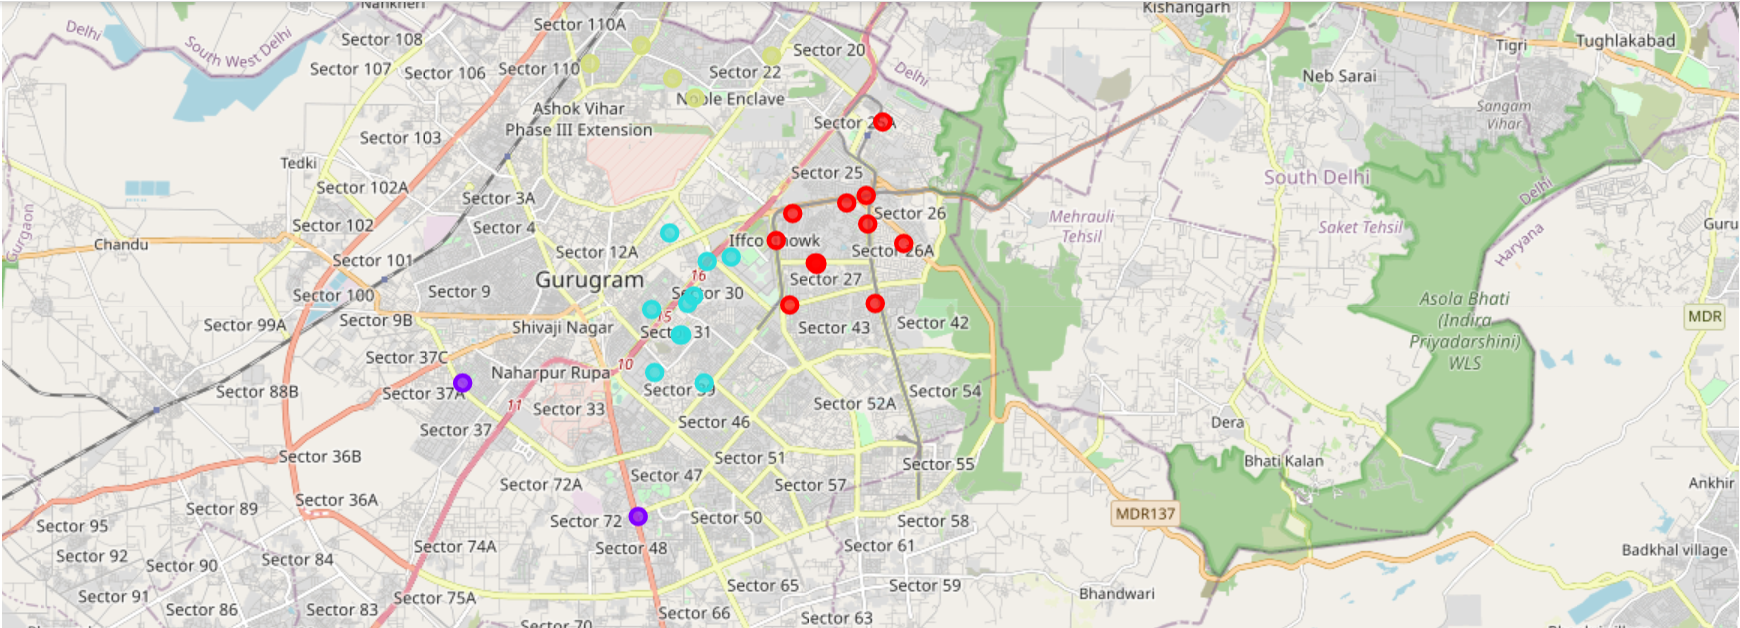

Area near sector 30 and 31 in gurgaon looks like a great place to open a cafe.